In [16]:
import re
import pandas as pd
import numpy as np


# Remove non-alphabetic characters (Data Cleaning)
def clean_text(column):

    for row in column:
        row = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1',  str(row))).split()
        row = ' '.join(row)
        row = re.sub("(\\t)", " ", str(row)).lower()
        row = re.sub("(\\r)", " ", str(row)).lower()
        row = re.sub("(\\n)", " ", str(row)).lower()


        # Remove the characters - <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",.\}`$\{;@?~*!+=_\//1234567890]", " ", str(row)).lower()
        row = re.sub(r"\\b(\\w+)(?:\\W+\\1\\b)+", "", str(row)).lower()


        # Remove punctuations at the end of a word
        row = re.sub("(\.\s+)", " ", str(row)).lower()
        row = re.sub("(\-\s+)", " ", str(row)).lower()
        row = re.sub("(\:\s+)", " ", str(row)).lower()


        # Replace any url to only the domain name
        try:
            url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(row))
            repl_url = url.group(3)
            row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(row))
        except:
            pass
            
        # Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()

        # Remove the single character hanging between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()
        
        

        yield row

In [17]:
df_code = pd.read_csv('python_Sample_dataset.csv')
df_code


,code,docstring,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"root.attributes('-topmost', True)",How to make a window jump to the front?,NaN,NaN,NaN
1,root.lift(),How to make a window jump to the front?,NaN,NaN,NaN
2,"hex(int(''.join([str(int(b)) for b in walls]),...",Elegant way to convert list to hex string,NaN,NaN,NaN
3,"hex(sum(b << i for i, b in enumerate(reversed(...",Elegant way to convert list to hex string,NaN,NaN,NaN
4,"print(('Total score for', name, 'is', score))",Print multiple arguments in python,NaN,NaN,NaN
...,...,...,...,...,...
2158,""""""""""""".join([1, 2, 3, 4])","how to change [1,2,3,4] to '1234' using python",NaN,NaN,NaN
2159,"line = line.decode('utf-8', 'ignore').encode('...",Delete every non utf-8 symbols froms string,NaN,NaN,NaN
2160,os.system(command),How to execute a command in the terminal from ...,NaN,NaN,NaN
2161,c.execute('SELECT * FROM foo WHERE bar = %s AN...,Python MySQL Parameterized Queries,NaN,NaN,NaN


In [19]:
df_code_p = df_code[["code","docstring"]]
df_code_p

,code,docstring
0,"root.attributes('-topmost', True)",How to make a window jump to the front?
1,root.lift(),How to make a window jump to the front?
2,"hex(int(''.join([str(int(b)) for b in walls]),...",Elegant way to convert list to hex string
3,"hex(sum(b << i for i, b in enumerate(reversed(...",Elegant way to convert list to hex string
4,"print(('Total score for', name, 'is', score))",Print multiple arguments in python
...,...,...
2158,""""""""""""".join([1, 2, 3, 4])","how to change [1,2,3,4] to '1234' using python"
2159,"line = line.decode('utf-8', 'ignore').encode('...",Delete every non utf-8 symbols froms string
2160,os.system(command),How to execute a command in the terminal from ...
2161,c.execute('SELECT * FROM foo WHERE bar = %s AN...,Python MySQL Parameterized Queries


In [20]:
print (df_code_p["docstring"][0])

How to make a window jump to the front?


# **Using the function clean_text, we preprocess the code and docstring (summary) columns of the dataset**

In [21]:
processed_code= clean_text(df_code_p['code'])
processed_summary = clean_text(df_code_p['docstring'])

In [22]:
import spacy
from time import time

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
code = [str(doc) for doc in nlp.pipe(processed_code, batch_size=50)]
summary = [ str(doc)  for doc in nlp.pipe(processed_summary, batch_size=50)]

#summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_summary, batch_size=50)]

In [23]:
print (summary)

['how to make window jump to the front ', 'how to make window jump to the front ', 'elegant way to convert list to hex string', 'elegant way to convert list to hex string', 'print multiple arguments in python', 'print multiple arguments in python', 'print multiple arguments in python', 'print multiple arguments in python', 'is it possible to serve static html page at the root of django project ', 'use list of values to select rows from pandas dataframe', 'how to get the concrete class name as string ', 'how can execute python code in virtualenv from matlab', 'django models selecting single field', 'python regex findall alternation behavior', 'how do make python to wait for pressed key', 'print string as hex literal python', 'python pymongo how to insert new field on an existing document in mongo from for loop', 'regex to match lol to lolllll and omg to omggg etc', 'getting the nth element using beautiful soup', 'reverse axis in py plot', 'reverse axis in py plot', 'how do stack two dat

In [24]:
df_code_p['code'] = code
df_code_p['docstring'] = summary
print(df_code_p)

                                                   code  \
0                        root attributes -topmost true    
1                                            root lift    
2                    hex int join str int for in walls    
3          hex sum i for b in enumerate reversed walls    
4                  print total score for name is score    
...                                                 ...   
2158                                              join    
2159            line line decode utf ignore encode utf    
2160                                 os system command    
2161  c execute select from foo where bar %s and baz...   
2162  dateobj datetime datetime strptime datestr y-%...   

                                              docstring  
0                 how to make window jump to the front   
1                 how to make window jump to the front   
2             elegant way to convert list to hex string  
3             elegant way to convert list to hex string  
4

C:\Users\91709\AppData\Local\Temp/ipykernel_12848/3996866731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_p['code'] = code
C:\Users\91709\AppData\Local\Temp/ipykernel_12848/3996866731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_p['docstring'] = summary


# **As all codes and docstrings are of different lengths, we can calculate the average length of pre-processed text in both the columns and decide on the length of the codes and doscstrings**

# **So ,first we collect the length of all records in a columns**

In [25]:
 import matplotlib.pyplot as plt

 text_count = []
 summary_count = []


 print(df_code_p['code'])
 for sent in df_code_p['code']:
    #  print (sent)
     text_count.append(len(sent.split()))
    
 for sent in df_code_p['docstring']:
     summary_count.append(len(sent.split()))

0                          root attributes -topmost true 
1                                              root lift 
2                      hex int join str int for in walls 
3            hex sum i for b in enumerate reversed walls 
4                    print total score for name is score 
                              ...                        
2158                                                join 
2159              line line decode utf ignore encode utf 
2160                                   os system command 
2161    c execute select from foo where bar %s and baz...
2162    dateobj datetime datetime strptime datestr y-%...
Name: code, Length: 2163, dtype: object


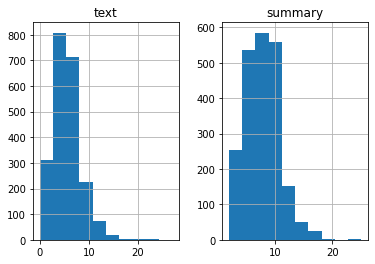

In [16]:
 graph_df = pd.DataFrame() 

 graph_df['text'] = text_count
 graph_df['summary'] = summary_count

 graph_df.hist(bins = 10)
 plt.show()

# **Based on the distribution across bins,we can set the maximum length**

In [26]:
max_code_len = 25
max_summary_len = 20


# Select the Summaries and Text which fall below max length 

import numpy as np

cleaned_code = np.array(df_code_p['code'])
cleaned_summary= np.array(df_code_p['docstring'])

short_text = []
short_summary = []

for i in range(len(cleaned_code)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_code[i].split()) <= max_code_len:
        short_text.append(cleaned_code[i])
        short_summary.append(cleaned_summary[i])
        
post_code = pd.DataFrame({'code': short_text,'summary': short_summary})

post_code

,code,summary
0,root attributes -topmost true,how to make window jump to the front
1,root lift,how to make window jump to the front
2,hex int join str int for in walls,elegant way to convert list to hex string
3,hex sum i for b in enumerate reversed walls,elegant way to convert list to hex string
4,print total score for name is score,print multiple arguments in python
...,...,...
2156,join,how to change to using python
2157,line line decode utf ignore encode utf,delete every non utf symbols froms string
2158,os system command,how to execute command in the terminal from py...
2159,c execute select from foo where bar %s and baz...,python my sql parameterized queries


In [27]:
post_code['summary'] = post_code['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_code.head(2)

,code,summary
0,root attributes -topmost true,sostok how to make window jump to the front e...
1,root lift,sostok how to make window jump to the front e...


# **We use the pre-processed codes and summaries that are within the maximum length and divide into train and test sets**

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(
    np.array(post_code["code"]),
    np.array(post_code["summary"]),
    test_size=0.15,
    random_state=0,
    shuffle=True,
)
print(x_train.shape)
print(y_train.shape)

(1836,)
(1836,)


## **We will not consider infrequent words in the vocabulary, as it may add noise**

In [36]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_train))

threshold = 2

cnt_infrequent = 0
total_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    total_cnt = total_cnt + 1
    if value < threshold:
        cnt_infrequent = cnt_infrequent + 1

    
print("% of not frequent words in vocabulary: ", (cnt_infrequent / total_cnt) * 100)

% of not frequent words in vocabulary:  45.55329260013578


In [37]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = total_cnt - cnt_infrequent) 
x_tokenizer.fit_on_texts(list(x_train))

# Convert text sequences to integer sequences 
x_train_seqs = x_tokenizer.texts_to_sequences(x_train) 
x_validation_seqs = x_tokenizer.texts_to_sequences(x_validation)
print (x_validation_seqs)
# Pad zero upto maximum length
x_train = pad_sequences(x_train_seqs,  maxlen=max_code_len, padding='post')
x_validation = pad_sequences(x_validation_seqs, maxlen=max_code_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1


print("Size of vocabulary in X = {}".format(x_voc))

[[126, 382], [76, 76], [216, 286, 13], [7, 6, 54, 75, 75, 11, 32], [600, 132, 601, 602, 463, 603, 31], [25, 715, 297, 78, 376], [3, 139, 3, 267, 26, 420, 128, 41], [6, 54], [163, 31], [157, 4, 2, 1, 11, 4], [21, 4, 649, 18, 5, 143, 116], [6, 43, 493], [3, 171, 267, 26, 51, 193, 31], [226, 22], [97, 119, 717, 135, 26, 1, 173, 173, 279], [3, 3, 34, 22, 49], [4, 90, 224], [133, 33, 17, 33, 183, 17, 33, 337, 46], [785, 338, 46, 84, 46, 84], [467, 52, 157, 62], [24, 4, 4, 2, 1, 24, 4, 9], [11, 77, 1], [485], [16, 29], [25, 141], [108, 250, 4, 37], [363, 2, 1, 197, 4, 9], [17, 244], [17, 383, 226], [67, 67, 2, 1, 37, 38, 39], [228, 240, 597, 240], [3, 40, 294, 124], [14, 14, 11, 201, 104, 23, 44, 12, 129, 44], [176, 100, 318], [61, 40, 2, 40, 1, 4, 117, 19, 41], [195], [30, 2, 1, 156], [6, 43, 16, 72, 87, 39], [2, 1, 4, 67, 2, 1, 37, 38, 4], [13, 59], [256, 298, 206, 256, 62, 89, 457, 256, 96, 256, 35], [7, 4, 90, 292, 185, 491], [181, 47, 5, 15, 64, 30, 20], [3, 24, 140], [8, 71], [21, 235,

In [38]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_train))

threshold = 5

cnt_infrequent = 0
total_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    total_cnt = total_cnt + 1
    if value < threshold:
        cnt_infrequent = cnt_infrequent + 1
    
print("% of rare words in vocabulary:",(cnt_infrequent / total_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words = total_cnt - cnt_infrequent) 
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences to integer sequences 
y_train_seqs = y_tokenizer.texts_to_sequences(y_train) 
y_validation_seqs = y_tokenizer.texts_to_sequences(y_validation)

# Pad zero upto maximum length
y_train = pad_sequences(y_train_seqs,  maxlen=max_summary_len, padding='post')
y_validation = pad_sequences(y_validation_seqs, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 72.12121212121212
Size of vocabulary in Y = 369


In [39]:
ind = []

for i in range(len(y_train)):
    cnt = 0
    for j in y_train[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_train = np.delete(y_train, ind, axis=0)
x_train = np.delete(x_train, ind, axis=0)

In [40]:
ind = []
for i in range(len(y_validation)):
    cnt = 0
    for j in y_validation[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_validation = np.delete(y_validation, ind, axis=0)
x_validation = np.delete(x_validation, ind, axis=0)

In [41]:
print(len(x_train))
print(len(y_train))
print(len(x_validation))
print(len(y_validation))

1833
1833
325
325


In [42]:
print((x_train[0]))
print((y_train[0]))

[36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
[  1  42   7   8   7  30  32 205   8   2   0   0   0   0   0   0   0   0
   0   0]


In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_code_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 25, 200)      160600      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 25, 300),    601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [46]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [48]:
history = model.fit(
    [x_train, y_train[:, :-1]],
    y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:],
    epochs=100,
    callbacks=[es],
    batch_size=128,
    validation_data=([x_validation, y_validation[:, :-1]],
                     y_validation.reshape(y_validation.shape[0], y_validation.shape[1], 1)[:
                     , 1:]),
    )

Epoch 1/100
15/15 [==============================] - 48s 3s/step - loss: 2.5854 - val_loss: 1.9998
Epoch 2/100
15/15 [==============================] - 53s 4s/step - loss: 2.0206 - val_loss: 1.8817
Epoch 3/100
15/15 [==============================] - 57s 4s/step - loss: 1.8911 - val_loss: 1.7708
Epoch 4/100
15/15 [==============================] - 61s 4s/step - loss: 1.7962 - val_loss: 1.7075
Epoch 5/100
15/15 [==============================] - 64s 4s/step - loss: 1.7513 - val_loss: 1.6741
Epoch 6/100
15/15 [==============================] - 69s 5s/step - loss: 1.7052 - val_loss: 1.6138
Epoch 7/100
15/15 [==============================] - 63s 4s/step - loss: 1.6550 - val_loss: 1.5860
Epoch 8/100
15/15 [==============================] - 69s 5s/step - loss: 1.6042 - val_loss: 1.5426
Epoch 9/100
15/15 [==============================] - 70s 5s/step - loss: 1.5511 - val_loss: 1.4908
Epoch 10/100
15/15 [==============================] - 69s 5s/step - loss: 1.5167 - val_loss: 1.4524
Epoch 11/

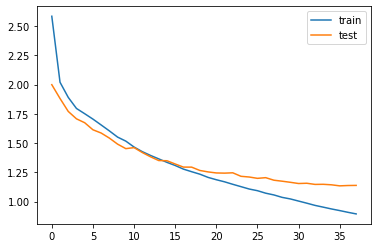

In [49]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [50]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [51]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_code_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [52]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [53]:
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [54]:
for i in range(0, 19):
    print ('Code:', seq2text(x_train[i]))
    print ('Original summary:', seq2summary(y_train[i]))
    print ('Predicted summary:', decode_sequence(x_train[i].reshape(1,
           max_code_len)))
    print ('\n')


Code: zip 
Original summary: elements of list of lists and return list 
Predicted summary:  how to get the values of list of list


Code: sys path append path to test 
Original summary: python find module in the same folder 
Predicted summary:  python regular expression match of


Code: dir 
Original summary: get all object attributes 
Predicted summary:  how to get the first name of string


Code: time mktime datetime datetime strptime d m y timetuple 
Original summary: convert string date to in python 
Predicted summary:  how to get the of in python


Code: result sys stdin read 
Original summary: read file from with python 
Predicted summary:  python regex for matching


Code: 
Original summary: python my sql update working but not 
Predicted summary:  how to get the first name of string


Code: t sorted list items key lambda x 
Original summary: create from dictionary of lists 
Predicted summary:  how to sort list of strings in python


Code: split for in list 
Original summary: re

In [55]:
for i in range(0, 19):
    print ('Code:', seq2text(x_validation[i]))
    print ('Original summary:', seq2summary(y_validation[i]))
    print ('Predicted summary:', decode_sequence(x_validation[i].reshape(1,
           max_code_len)))
    print ('\n')


Code: time sleep 
Original summary: make time 
Predicted summary:  how to get the of in python


Code: t t 
Original summary: numpy matrix 
Predicted summary:  how to get the first element of an array


Code: struct unpack s 
Original summary: how do convert string of values to list of integers 
Predicted summary:  convert hex string to int


Code: print re findall u u my string 
Original summary: how to only from string using regular expression 
Predicted summary:  python regular expression matching of


Code: dparser parse monkey love banana fuzzy true 
Original summary: extracting date from string in python 
Predicted summary:  how to get the of in python


Code: np genfromtxt myfile csv delimiter 
Original summary: read csv into array in numpy 
Predicted summary:  python how to get the of plot


Code: df loc df column name isin some values 
Original summary: select rows from data frame based on values in column in pandas 
Predicted summary:  pandas data frame to list of columns


C